In [37]:
# !pip install polyagamma
# ! pip install tensorboard
# !pip install pyhmc
# ! pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.


In [1]:
# from polyagamma import random_polyagamma
import matplotlib.pyplot as plt
import numpy as np
from nbreg_pg import *
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from pyhmc import hmc
# from scipy.special import gamma, digamma
# from tqdm import tqdm

# import warnings
# warnings.filterwarnings("ignore")

/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


This is a Python implementation for MCMC sampling for NB regression. Here, I follow the notation for **general NB** distribution (to link with Poisson), i.e., assume $y_i \sim NB(r_i, p_i)$, where $r_i$ is the "failure number" and expectation is $\mu_i = r_i p_i/ (1-p_i)$. Here I use the mean parametrization with log link: $\log{\mu_i} = x_i'\beta$.

First generate some data.

In [2]:
## data generation...
n = 100
q = 3

np.random.seed(1)
X = np.column_stack((np.ones(n), np.random.normal(size = (n,q-1))))
beta_true = np.random.normal(size = (q,1)) 
mu_true = np.exp(X @ beta_true)
# r_true = np.random.gamma(2,1)
r_true = 2

# be careful: the numpy implementation denote r as "success number", but y is "failgure number"
# so this is numpy p_true, our p_true = (mu_true)/(r_true + mu_true)
p_true = r_true/(r_true+mu_true)
y = np.random.negative_binomial(r_true, p_true[:,0], size=None)

To sample r, here I provide 2 options:
1) use Zhou et al. method to do Gibbs sampling for r.
2) use HMC.

In [11]:
beta_trace_hmc, r_trace_hmc = nbreg_mcmc(y, X, iter_num = 5000, use_hmc = True)
beta_trace_gb, r_trace_gb = nbreg_mcmc(y, X, iter_num = 5000, use_hmc = False)

100%|██████████| 4999/4999 [00:06<00:00, 826.81it/s]


plot the trace for dispersion parameter 2

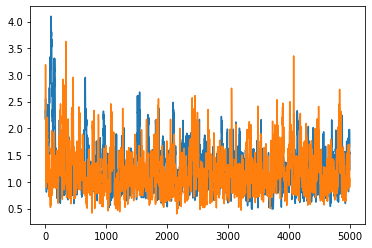

In [12]:
plt.plot(r_trace_hmc)
plt.plot(r_trace_gb)

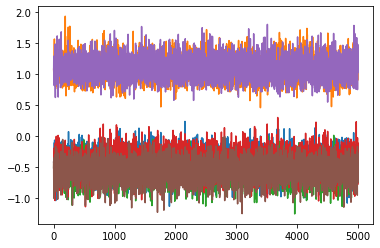

In [13]:
plt.plot(beta_trace_hmc)
plt.plot(beta_trace_gb)